In [1]:
import pickle
import pandas as pd

In [2]:
test_region = "Austin"
train_region = "SanDiego"
out_overall = pickle.load(open('../data/input/all_regions.pkl','r'))

train_df = out_overall[train_region]
test_df = out_overall[test_region]

In [3]:
from missingno import missingno
import numpy as np

In [4]:
%matplotlib inline

In [5]:
start_month, end_month=1,13
agg_features = np.hstack([['aggregate_'+str(month) for month in range(start_month, end_month)],
                         ])
md_features = ['area','house_num_rooms','num_occupants']
features = {'md_agg':np.hstack([
            agg_features,
            md_features
            ]).tolist()}

In [6]:
df = pd.concat([test_df[features['md_agg']], train_df[features['md_agg']]])

In [7]:
import calendar
df = df.rename(columns={'aggregate_%d' %month: calendar.month_name[month][:3] for month in range(1, 13)})

In [8]:
df = df.rename(columns={'area':'Area','house_num_rooms':'\# rooms','num_occupants':'\# occupants'})

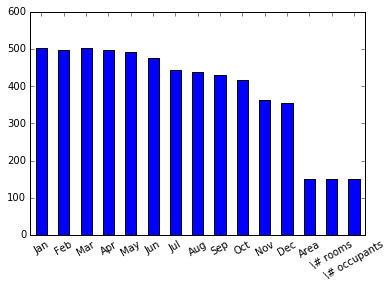

In [14]:
df.count().plot(kind="bar",rot=30)

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


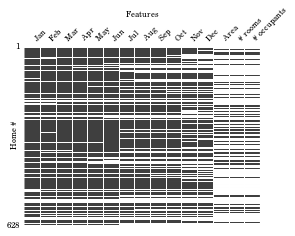

In [9]:
a = missingno(df, figsize=(4.5,3.2), fontsize=8, filename='../results/spark.pdf')

In [13]:
import matplotlib.pyplot as plt
a.savefig('../results/spark.png')

In [10]:
cols = df.columns

In [11]:
num = {col:len(df[col].dropna()) for col in cols}


In [19]:
import sys


In [20]:
sys.path.append('../code/')

In [21]:
from common_functions import latexify, format_axes, tableau20blind
import matplotlib.pyplot as plt

In [22]:
latexify()

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


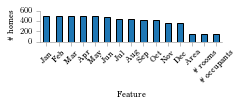

In [38]:
latexify(fig_height=1.5)
ax = pd.Series(df.count()).plot(kind="bar", color=tableau20blind[0],rot=45)
format_axes(ax)
plt.xlabel("Feature")
plt.ylabel("\# homes")
plt.locator_params(axis='y',nbins=5)
plt.tight_layout()
plt.savefig("../results/features.png",bbox_inches="tight")
plt.savefig("../results/features.pdf",bbox_inches="tight")

In [18]:
ndf = pd.concat([test_df[features['md_agg']], train_df[features['md_agg']]])

In [20]:
cols = [x for x in ndf.columns if 'wm' in x]

In [23]:
ndf['wm_1']

KeyError: 'wm_1'

In [80]:
b = pd.Series(dd[train_region]['Cooling'])

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
clf = LinearRegression()

In [83]:
clf.fit(a.values.reshape(12,1), b.values.reshape(12,))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
clf.coef_

array([-0.46208592])

In [85]:
clf.intercept_

270.49793582944153

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

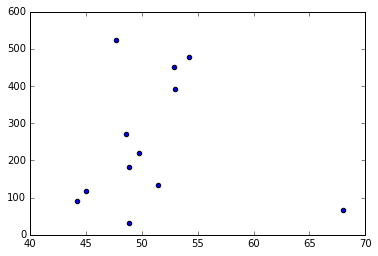

In [87]:
plt.scatter(a,b)

In [88]:
baseline = a.min()

In [89]:
baseline

44.138683319091797

In [90]:
difference = a.max()-baseline
difference

23.884716033935547

In [91]:
factor = difference/(b.max()-b.min())

In [92]:
factor

0.048546170800682006

In [93]:
(baseline + factor*b) - a

0    -20.632123
1      4.466248
2      5.053311
3      4.203697
4     -0.787885
5      8.801791
6     10.193200
7     13.103335
8     21.872794
9     13.124307
10     4.909166
11    -3.187955
dtype: float64

In [94]:
import numpy as np
A = np.ones((12,2))
A[:,0] = b.values

In [95]:
A

array([[  67.,    1.],
       [  92.,    1.],
       [ 219.,    1.],
       [ 183.,    1.],
       [ 135.,    1.],
       [ 272.,    1.],
       [ 392.,    1.],
       [ 478.,    1.],
       [ 524.,    1.],
       [ 451.,    1.],
       [ 118.,    1.],
       [  32.,    1.]])

In [96]:
a.values

array([ 68.02339935,  44.13868332,  49.7169838 ,  48.81893539,
        51.4803009 ,  48.5414505 ,  52.97558212,  54.24041748,
        47.70408249,  52.90869904,  44.95796585,  48.88011551])

In [97]:
from scipy.optimize import nnls

In [58]:
nnls(A, a.values)[0]

array([  0.02877937,  27.95756087])

In [98]:
nnls(A, a.values)[0]

array([  0.        ,  51.03221798])

In [77]:
a

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: 527, dtype: float64

In [177]:
out = {}
for home in train_df.index:
    
    a = train_df.ix[home][['fridge_%d' %month for month in range(1,13)]]
    a = a.dropna()
    
    if len(a)<1:
        continue
    else:
        a.index = [int(x[-1]) for x in a.index.str.split("_")]
        b = pd.Series(dd[train_region]['Cooling'])
        b.index = range(1,13)
        b = b.ix[a.index]
        import numpy as np
        A = np.ones((len(b),2))
        A[:,0] = b.values
        dd_factor = nnls(A, a.values)[0]
        out[home] = {'baseline':dd_factor[1],'cdd':dd_factor[0]}
        


In [178]:
out

{203: {'baseline': 27.957560874390339, 'cdd': 0.028779374489510089},
 1450: {'baseline': 51.032217979431145, 'cdd': 0.0},
 1524: {'baseline': 48.400031922442494, 'cdd': 0.029877297836492726},
 1731: {'baseline': 33.777273122717972, 'cdd': 0.034800893729134412},
 3687: {'baseline': 70.417844189537917, 'cdd': 0.0},
 3864: {'baseline': 24.379166591529614, 'cdd': 0.045061656246849303},
 3938: {'baseline': 32.321743348807757, 'cdd': 0.029384676043138918},
 4495: {'baseline': 17.976511873027135, 'cdd': 0.029817507481758276},
 4934: {'baseline': 35.507634601084867, 'cdd': 0.034759510697650285},
 5938: {'baseline': 27.869158302132295, 'cdd': 0.021374314472701859},
 6377: {'baseline': 0.0, 'cdd': 0.62677138598997206},
 6547: {'baseline': 41.427546620368972, 'cdd': 0.0},
 7062: {'baseline': 26.251816925905697, 'cdd': 0.067048340844727605},
 7114: {'baseline': 45.773849871435374, 'cdd': 0.014881450476219143},
 8061: {'baseline': 44.467105876765082, 'cdd': 0.052145276521206402},
 8342: {'baseline'

In [179]:
import pickle
pickle.dump(out, open('../data/input/SanDiego_fridge_dd_coef.pkl','w'))

In [131]:
(train_df['hvac_3']/train_df['aggregate_3']).dropna().describe()

count    21.000000
mean      0.090894
std       0.078357
min       0.000000
25%       0.035885
50%       0.064931
75%       0.132155
max       0.282409
dtype: float64

In [136]:
te = pd.Series([(test_df['hvac_%d' %month]/test_df['aggregate_%d' %month]).dropna().mean() for month in range(1,13)])

In [137]:
tr = pd.Series([(train_df['hvac_%d' %month]/train_df['aggregate_%d' %month]).dropna().mean() for month in range(1,13)])

In [138]:
te/tr

0     12.880313
1      2.611318
2      0.883466
3      4.047109
4      7.522609
5      3.131906
6      1.938266
7      1.438584
8      1.156132
9      1.300389
10     7.364232
11    21.962514
dtype: float64

In [150]:
dd_tr = pd.Series(dd[train_region]['Cooling'])
dd_te = pd.Series(dd[test_region]['Cooling'])

In [142]:
dd_tr/dd_te

0     0.228438
1     0.283133
2     0.907258
3     0.626712
4     0.312785
5     0.469775
6     0.541436
7     0.639893
8     0.849271
9     1.199468
10    0.585253
11    0.487500
dtype: float64

In [147]:
te_re = pd.Series([(test_df['hvac_%d' %month]).dropna().mean() for month in range(1,13)])

In [144]:
tr_re = pd.Series([(train_df['hvac_%d' %month]).dropna().mean() for month in range(1,13)])

In [145]:
tr_re

0       1.872984
1       9.612234
2      41.898885
3      16.089301
4      11.544653
5      54.993461
6     139.051996
7     200.787931
8     218.475030
9     100.481623
10      4.081113
11      0.206767
dtype: float64

In [148]:
te_re

0      52.150156
1      40.880130
2      48.165750
3     117.801139
4     204.009346
5     397.867762
6     621.342580
7     687.226764
8     482.024772
9     241.425677
10     45.617709
11     34.335550
dtype: float64

In [151]:
dd_tr

0      67
1      92
2     219
3     183
4     135
5     272
6     392
7     478
8     524
9     451
10    118
11     32
dtype: int64

In [153]:
dd_te

0       0
1      16
2      97
3     292
4     438
5     579
6     724
7     747
8     617
9     376
10    122
11     46
dtype: int64

In [154]:
te

0     0.056387
1     0.052821
2     0.080302
3     0.171690
4     0.249276
5     0.407293
6     0.455714
7     0.475609
8     0.416599
9     0.286289
10    0.073315
11    0.036751
dtype: float64

In [159]:
train_df['hvac_11'].dropna().describe()

count    15.000000
mean      4.081113
std       8.103378
min       0.000000
25%       0.007233
50%       0.041517
75%       2.828808
max      28.109400
Name: hvac_11, dtype: float64

In [160]:
test_df['hvac_11'].dropna().describe()

count    321.000000
mean      45.617709
std       52.136986
min        0.000000
25%       11.195600
50%       29.063833
75%       63.795082
max      443.325623
Name: hvac_11, dtype: float64

In [161]:
store = pd.HDFStore('/Users/nipunbatra/wiki-all.h5')

In [172]:
d = store['203']['2015']

In [173]:
d['furnace1'].resample("1M",how="mean")

2015-01-31 00:00:00-06:00     10.746192
2015-02-28 00:00:00-06:00      8.304787
2015-03-31 00:00:00-05:00     23.541351
2015-04-30 00:00:00-05:00     17.433727
2015-05-31 00:00:00-05:00     16.861671
2015-06-30 00:00:00-05:00     40.123264
2015-07-31 00:00:00-05:00     70.487862
2015-08-31 00:00:00-05:00     80.439026
2015-09-30 00:00:00-05:00    133.242264
2015-10-31 00:00:00-05:00     38.258335
2015-11-30 00:00:00-06:00     11.904202
2015-12-31 00:00:00-06:00     24.224037
Freq: M, Name: furnace1, dtype: float32

In [174]:
d['air1'].resample("1M",how="mean")

2015-01-31 00:00:00-06:00      0.002688
2015-02-28 00:00:00-06:00      0.004018
2015-03-31 00:00:00-05:00     39.156132
2015-04-30 00:00:00-05:00     27.293310
2015-05-31 00:00:00-05:00     21.319757
2015-06-30 00:00:00-05:00     94.795349
2015-07-31 00:00:00-05:00    196.064606
2015-08-31 00:00:00-05:00    232.893326
2015-09-30 00:00:00-05:00    282.432892
2015-10-31 00:00:00-05:00     96.910751
2015-11-30 00:00:00-06:00      0.862140
2015-12-31 00:00:00-06:00      3.816555
Freq: M, Name: air1, dtype: float32

In [175]:
out

{203: array([ 0.29190353,  0.        ]),
 1450: array([ 0.9143589,  0.       ]),
 1524: array([ 0.51203736,  0.        ]),
 1731: array([ 0.45050533,  0.        ]),
 2354: array([  7.71144214e-06,   0.00000000e+00]),
 2606: array([ 0.56204333,  0.        ]),
 3687: array([ 0.27879851,  0.        ]),
 3864: array([ 0.32137313,  0.        ]),
 3938: array([ 0.09568063,  0.        ]),
 4495: array([ 0.01884794,  0.        ]),
 4934: array([ 0.20995434,  0.        ]),
 5938: array([ 0.19611778,  0.        ]),
 6377: array([  3.80596994e-05,   0.00000000e+00]),
 6547: array([ 0.16778239,  0.        ]),
 7062: array([  1.73105309e-03,   1.79224783e+01]),
 7114: array([ 0.42238318,  0.        ]),
 8061: array([ 0.66379038,  0.        ]),
 8342: array([ 0.01812899,  0.        ]),
 8574: array([ 0.00041144,  0.        ]),
 8733: array([ 0.47415678,  0.        ]),
 9213: array([ 0.06268899,  0.        ]),
 9585: array([ 0.02245,  0.     ]),
 9612: array([  0.1361051 ,  13.46830365]),
 9775: arra

In [176]:
pickle.load(open('../data/input/SanDiego_fridge_dd_coef.pkl','r'))

{203: 0.028779374489510089,
 1450: 0.0,
 1524: 0.029877297836492726,
 1731: 0.034800893729134412,
 3687: 0.0,
 3864: 0.045061656246849303,
 3938: 0.029384676043138918,
 4495: 0.029817507481758276,
 4934: 0.034759510697650285,
 5938: 0.021374314472701859,
 6377: 0.62677138598997206,
 6547: 0.0,
 7062: 0.067048340844727605,
 7114: 0.014881450476219143,
 8061: 0.052145276521206402,
 8342: 0.035310534809039056,
 8574: 0.34767560816522852,
 8733: 0.0,
 9213: 0.0,
 9585: 0.33573210417334715,
 9612: 0.0,
 9775: 0.011386785471709548,
 9836: 0.0}

In [180]:
out

{203: {'baseline': 27.957560874390339, 'cdd': 0.028779374489510089},
 1450: {'baseline': 51.032217979431145, 'cdd': 0.0},
 1524: {'baseline': 48.400031922442494, 'cdd': 0.029877297836492726},
 1731: {'baseline': 33.777273122717972, 'cdd': 0.034800893729134412},
 3687: {'baseline': 70.417844189537917, 'cdd': 0.0},
 3864: {'baseline': 24.379166591529614, 'cdd': 0.045061656246849303},
 3938: {'baseline': 32.321743348807757, 'cdd': 0.029384676043138918},
 4495: {'baseline': 17.976511873027135, 'cdd': 0.029817507481758276},
 4934: {'baseline': 35.507634601084867, 'cdd': 0.034759510697650285},
 5938: {'baseline': 27.869158302132295, 'cdd': 0.021374314472701859},
 6377: {'baseline': 0.0, 'cdd': 0.62677138598997206},
 6547: {'baseline': 41.427546620368972, 'cdd': 0.0},
 7062: {'baseline': 26.251816925905697, 'cdd': 0.067048340844727605},
 7114: {'baseline': 45.773849871435374, 'cdd': 0.014881450476219143},
 8061: {'baseline': 44.467105876765082, 'cdd': 0.052145276521206402},
 8342: {'baseline'

In [207]:
train_df['hvac_12'].dropna().describe()

count    15.000000
mean      0.206767
std       0.728940
min       0.000000
25%       0.000000
50%       0.005883
75%       0.026517
max       2.839517
Name: hvac_12, dtype: float64

In [208]:
test_df['hvac_12'].dropna().describe()

count    313.000000
mean      34.335550
std       73.584854
min        0.000000
25%        0.419400
50%        8.474133
75%       29.565916
max      506.951752
Name: hvac_12, dtype: float64

In [221]:
train_df['wm_12'].dropna()

3938    1.802800
9775    3.436233
Name: wm_12, dtype: float64

In [223]:
test_df['wm_12'].dropna().describe()

count    180.000000
mean       4.775413
std        8.976150
min        0.000000
25%        1.967563
50%        3.283075
75%        4.614083
max      100.955681
Name: wm_12, dtype: float64